In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

import pandas_profiling

In [2]:
plt.style.use('ggplot')

In [3]:
data_folder="D:\\acea-water-prediction\\"

In [4]:
for i in os.listdir(data_folder):
    print(i)

Aquifer_Auser.csv
Aquifer_Doganella.csv
Aquifer_Luco.csv
Aquifer_Petrignano.csv
datasets_description.ods
Lake_Bilancino.csv
River_Arno.csv
Water_Spring_Amiata.csv
Water_Spring_Lupa.csv
Water_Spring_Madonna_di_Canneto.csv
~$datasets_description.ods


In [5]:
df_Auser_Aquifer=pd.read_csv(data_folder+"Aquifer_Auser.csv")
df_Auser_Aquifer['Date'] = pd.to_datetime(df_Auser_Aquifer['Date'], dayfirst=True)

df_Doganella_Aquifer=pd.read_csv(data_folder+"Aquifer_Doganella.csv")
df_Luco_Aquifer=pd.read_csv(data_folder+"Aquifer_Luco.csv")
df_Petrignano_Aquifer=pd.read_csv(data_folder+"Aquifer_Petrignano.csv")
df_Bilancino_Lake=pd.read_csv(data_folder+"Lake_Bilancino.csv")
df_Arno_River=pd.read_csv(data_folder+"River_Arno.csv")
df_Amiata_Water_Spring=pd.read_csv(data_folder+"Water_Spring_Amiata.csv")
df_Lupa_Water_Spring=pd.read_csv(data_folder+"Water_Spring_Lupa.csv")
df_Madonna_di_Canneto_Water_Spring=pd.read_csv(data_folder+"Water_Spring_Madonna_di_Canneto.csv")

In [6]:
df_Auser_Aquifer_2020 = df_Auser_Aquifer[(df_Auser_Aquifer['Date'] >= '2019-01-01') & (df_Auser_Aquifer['Date'] < '2020-01-01')]

In [7]:
df_Auser_Aquifer.columns

Index(['Date', 'Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico', 'Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC',
       'Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione'],
      dtype='object')

In [32]:
def missing_values(df):
    fig, ax = plt.subplots(1, 1, figsize=(16,10))

    ax1 = ax.pcolormesh(df.isnull().T, cmap='Blues')
    ax.set_yticks([x + 0.5 for x in range(0,len(df.columns))])
    ax.set_yticklabels([x + " - " + str(round(sum(df[x].isnull())/df.shape[0]*100,2)) + "%" for x in df.columns])

    ax.set_title("Missing Values",
                {'fontsize':25})
    plt.show()

In [9]:
len(df_Auser_Aquifer.corr('pearson').columns)

26

In [10]:
np.arange(0,1,1/len(df_Auser_Aquifer.corr('pearson').columns))

array([0.        , 0.03846154, 0.07692308, 0.11538462, 0.15384615,
       0.19230769, 0.23076923, 0.26923077, 0.30769231, 0.34615385,
       0.38461538, 0.42307692, 0.46153846, 0.5       , 0.53846154,
       0.57692308, 0.61538462, 0.65384615, 0.69230769, 0.73076923,
       0.76923077, 0.80769231, 0.84615385, 0.88461538, 0.92307692,
       0.96153846])

In [27]:
def corr_graph(df):
    fig, ax1 = plt.subplots(1,1,figsize=(10,8))
    ax1.set_title("Correlation Graph")
    corr = df.corr('pearson')
    pcm = ax1.pcolormesh(corr)
    ax1.set_xticks(np.arange(0.5,len(corr.columns)))
    ax1.set_xticklabels(corr.columns, rotation='vertical')
    ax1.set_yticks(np.arange(0.5,len(corr.columns)))
    ax1.set_yticklabels(corr.columns)
    plt.colorbar(pcm, ax=ax1)
    plt.show()

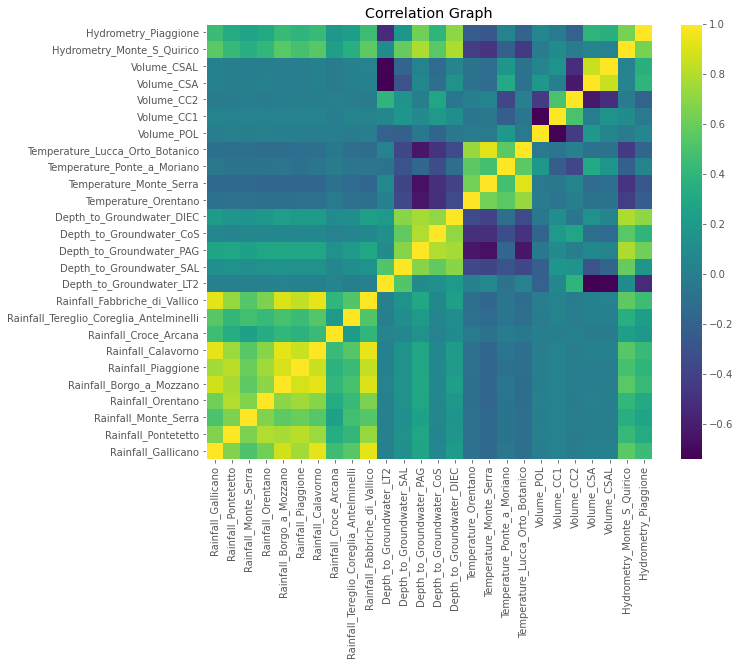

In [28]:
corr_graph(df_Auser_Aquifer)

In [34]:
def data_quality_report(df):
    n_rows = df.shape[0]
    n_cols = df.shape[1]
    
    desc = df.describe().T
    
    desc['miss %'] = desc['count'].apply(lambda x : round((n_rows - x)*100/n_rows,2))
    desc['card'] = [len(df[x].value_counts()) for x in desc.index]
    
    desc = desc[['count', 'miss %', 'card', 'min', '25%', '50%', '75%', 'max', 'mean', 'std']]

    print("No. of rows: " + str(n_rows))
    print("No. of cols: " + str(n_cols))
    
    print("Data types:")
    
    display(df.dtypes)
    display(df.dtypes.value_counts())
    display(desc)
    
    n_num_cols = desc.shape[0]
    numeric_cols = list(desc.index)
    
    if(n_num_cols > 5):     
        df.hist(figsize=(20,((n_num_cols//5)+1)*4), layout=((n_num_cols//5)+1, 5), bins=100)
        df[numeric_cols].plot(figsize=(20,n_num_cols*4), layout=(n_num_cols,1), kind='line', subplots=True)
        plt.show()
        
    else:
        df.hist(figsize=(20,5), layout=(1, n_num_cols), bins=100)
        df[numeric_cols].plot(figsize=(20,5), layout=(n_num_cols,1), kind='line', subplots=True)
        plt.show()
        
    missing_values(df)
    corr_graph(df)

No. of rows: 8154
No. of cols: 27
Data types:


Date                                       datetime64[ns]
Rainfall_Gallicano                                float64
Rainfall_Pontetetto                               float64
Rainfall_Monte_Serra                              float64
Rainfall_Orentano                                 float64
Rainfall_Borgo_a_Mozzano                          float64
Rainfall_Piaggione                                float64
Rainfall_Calavorno                                float64
Rainfall_Croce_Arcana                             float64
Rainfall_Tereglio_Coreglia_Antelminelli           float64
Rainfall_Fabbriche_di_Vallico                     float64
Depth_to_Groundwater_LT2                          float64
Depth_to_Groundwater_SAL                          float64
Depth_to_Groundwater_PAG                          float64
Depth_to_Groundwater_CoS                          float64
Depth_to_Groundwater_DIEC                         float64
Temperature_Orentano                              float64
Temperature_Mo

float64           26
datetime64[ns]     1
dtype: int64

,count,miss %,card,min,25%,50%,75%,max,mean,std
Rainfall_Gallicano,5295.0,35.06,314,0.000000e+00,0.000000,0.00000,2.000,318.800000,4.948782,14.366480
Rainfall_Pontetetto,5295.0,35.06,259,0.000000e+00,0.000000,0.00000,1.000,146.600000,3.495449,9.983772
Rainfall_Monte_Serra,5289.0,35.14,265,0.000000e+00,0.000000,0.00000,1.600,152.200000,3.919077,10.815270
Rainfall_Orentano,5295.0,35.06,237,0.000000e+00,0.000000,0.00000,1.000,108.800000,3.150670,8.747507
Rainfall_Borgo_a_Mozzano,5295.0,35.06,295,0.000000e+00,0.000000,0.00000,2.000,176.600000,4.578961,12.771166
Rainfall_Piaggione,4930.0,39.54,280,0.000000e+00,0.000000,0.00000,1.400,140.800000,3.953976,10.888103
Rainfall_Calavorno,5295.0,35.06,297,0.000000e+00,0.000000,0.00000,2.000,209.000000,4.578886,12.461918
Rainfall_Croce_Arcana,5295.0,35.06,212,0.000000e+00,0.000000,0.00000,1.400,285.000000,2.849745,9.239679
Rainfall_Tereglio_Coreglia_Antelminelli,5295.0,35.06,280,0.000000e+00,0.000000,0.00000,2.000,147.200000,4.182927,11.135511
Rainfall_Fabbriche_di_Vallico,5295.0,35.06,346,0.000000e+00,0.000000,0.00000,3.000,197.000000,5.922304,16.281733


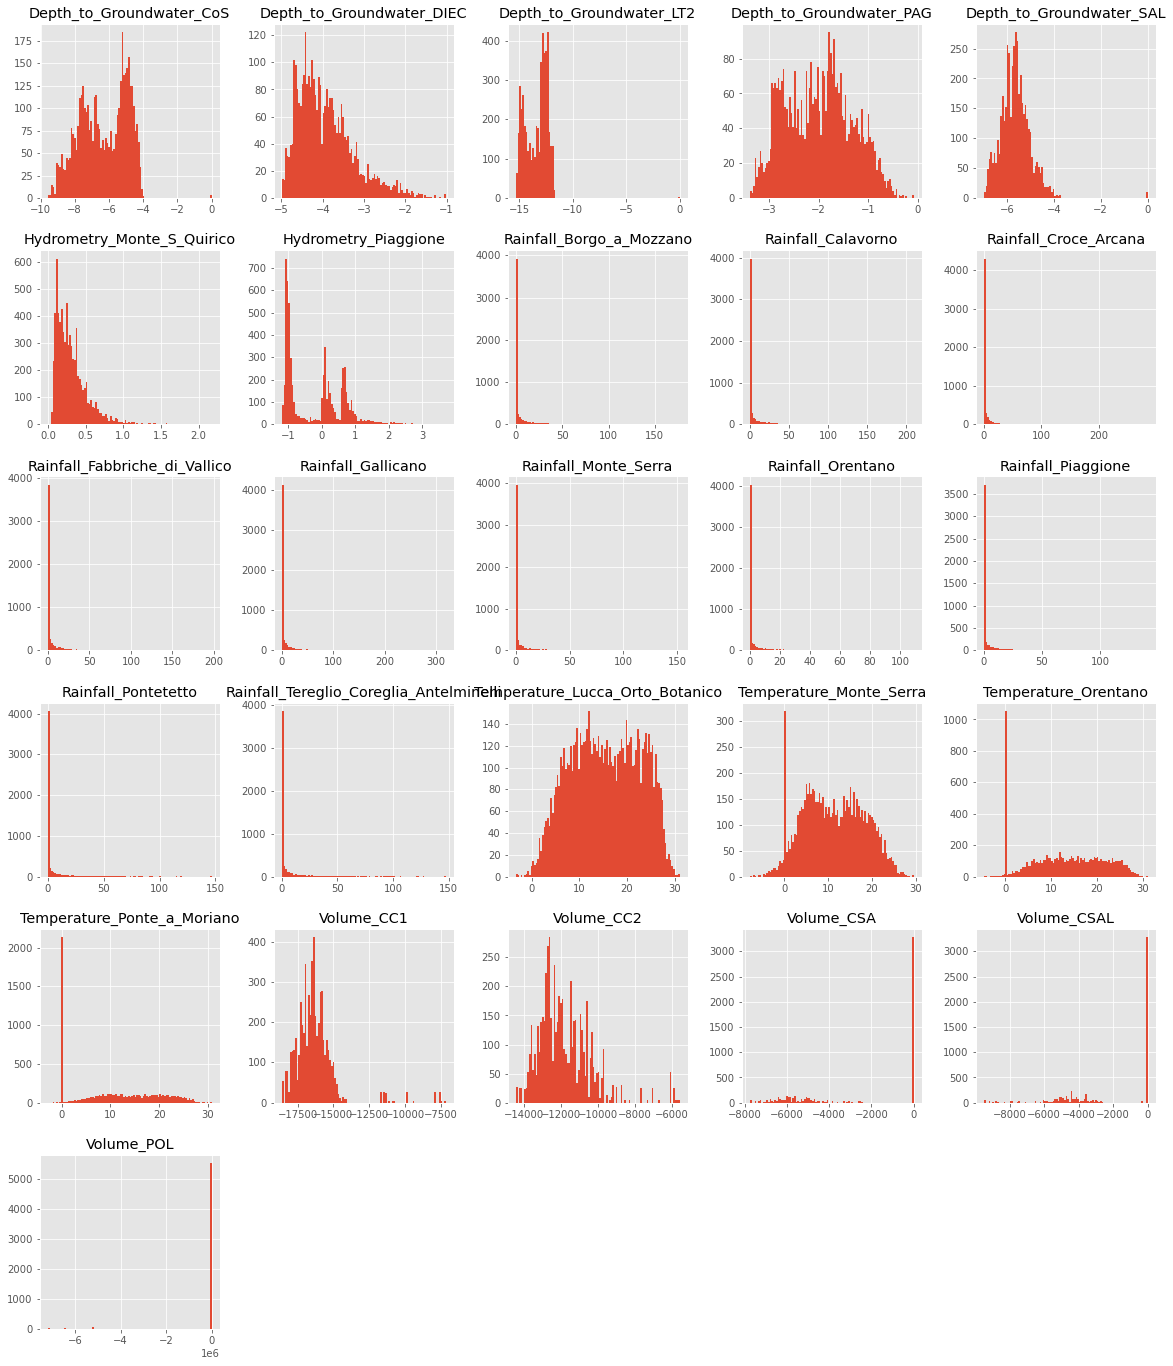

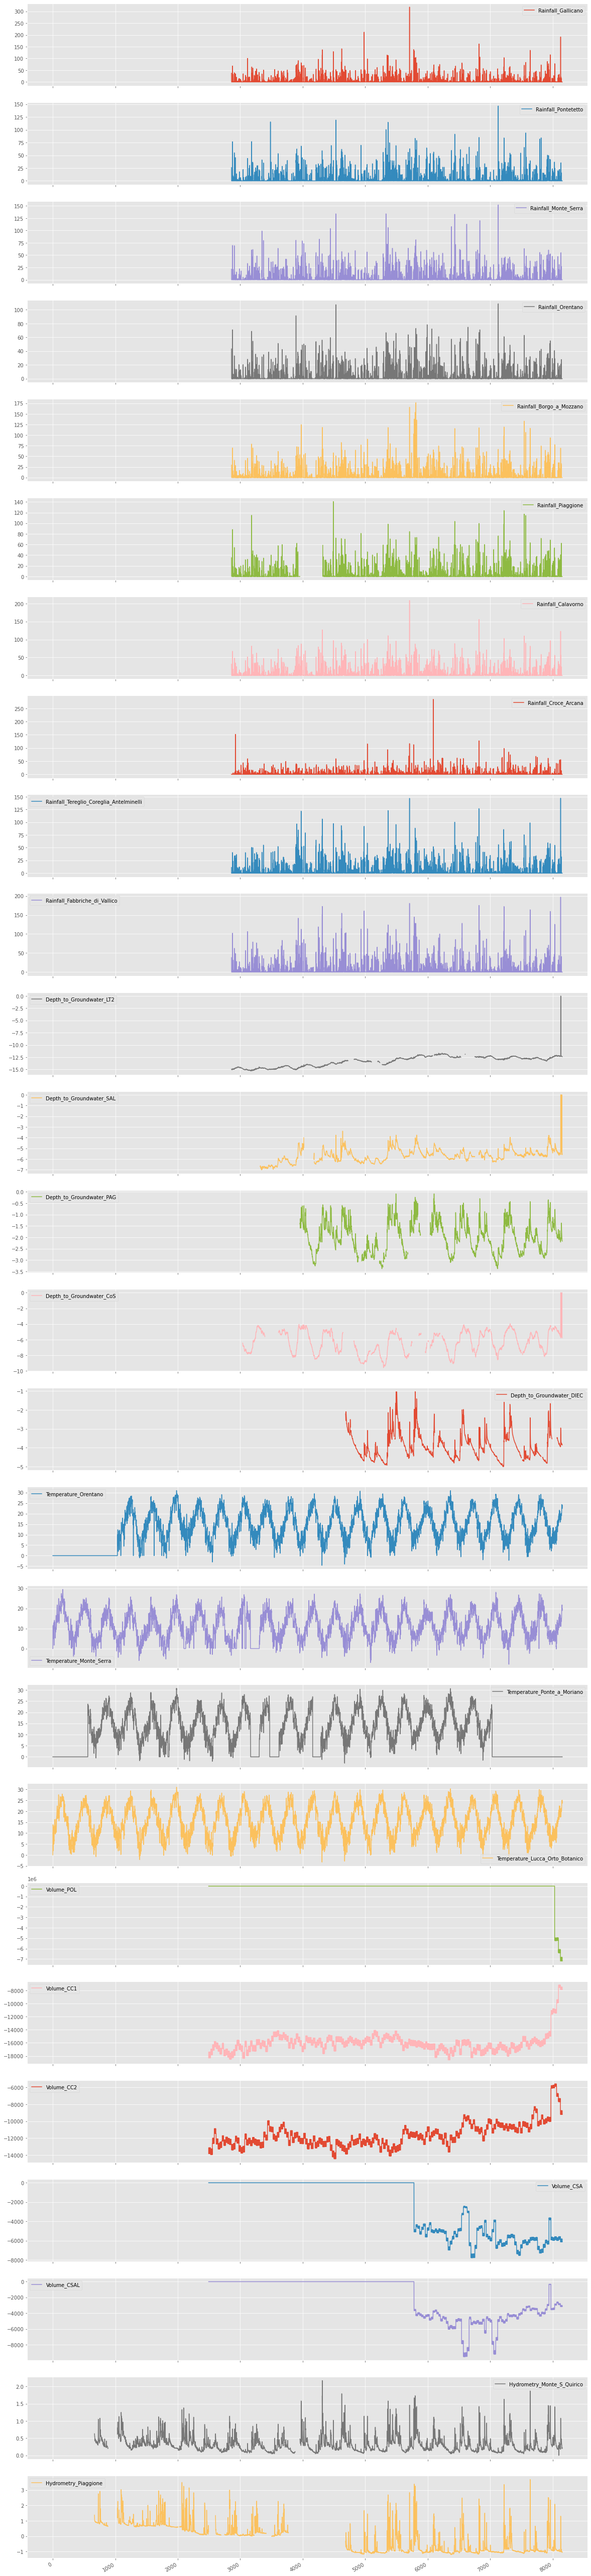

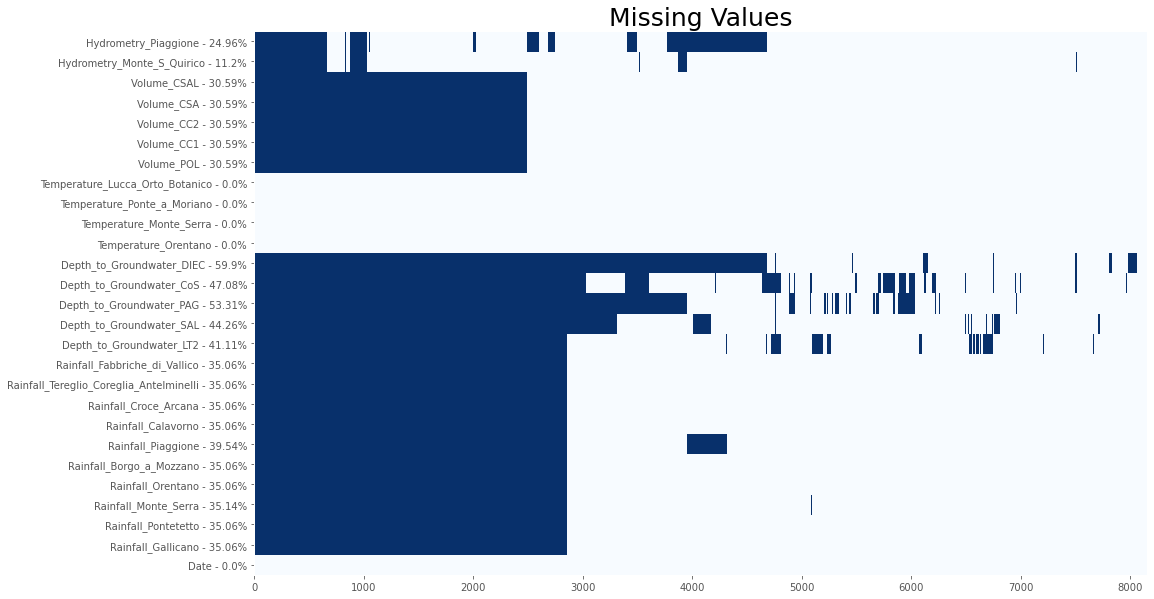

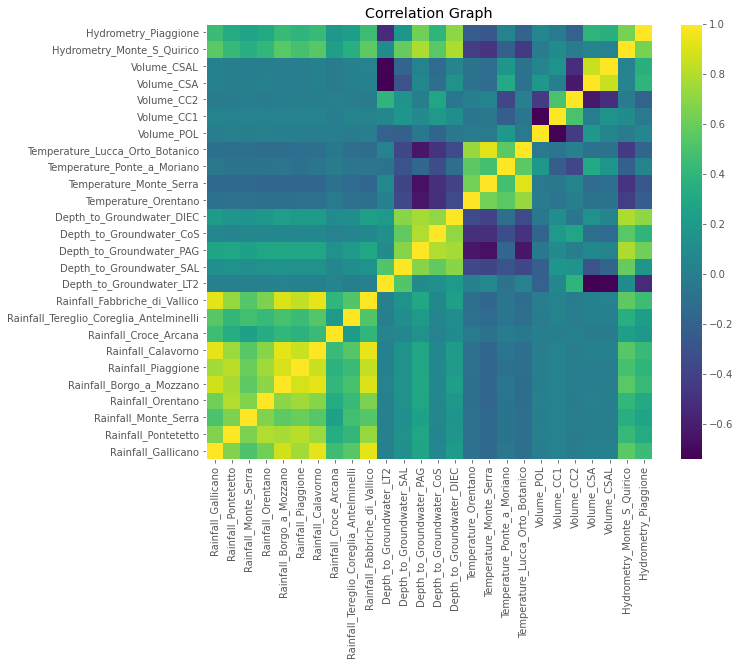

In [35]:
pd.set_option('display.max_rows',5000)
data_quality_report(df_Auser_Aquifer)